In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
df = pd.read_csv('Q5.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head(20)


,bill_total_billed,payment_total_tip,waiter_uuid
0,21.81,0.0,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD
1,48.95,0.0,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD
2,26.94,0.0,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD
3,3.96,0.0,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD
4,3.36,0.0,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD
5,16.36,0.0,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD
6,17.42,0.0,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD
7,25.11,0.0,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD
8,4.97,0.0,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD
9,19.00,6.0,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD


In [32]:
df.describe()

,bill_total_billed,payment_total_tip
count,8.954786e+06,8.954786e+06
mean,3.674831e+01,3.654212e+00
std,8.337650e+01,1.753186e+02
min,-5.731500e+03,-2.531400e+02
25%,1.044000e+01,0.000000e+00
50%,2.189000e+01,0.000000e+00
75%,4.465000e+01,4.070000e+00
max,7.492861e+04,5.227156e+05


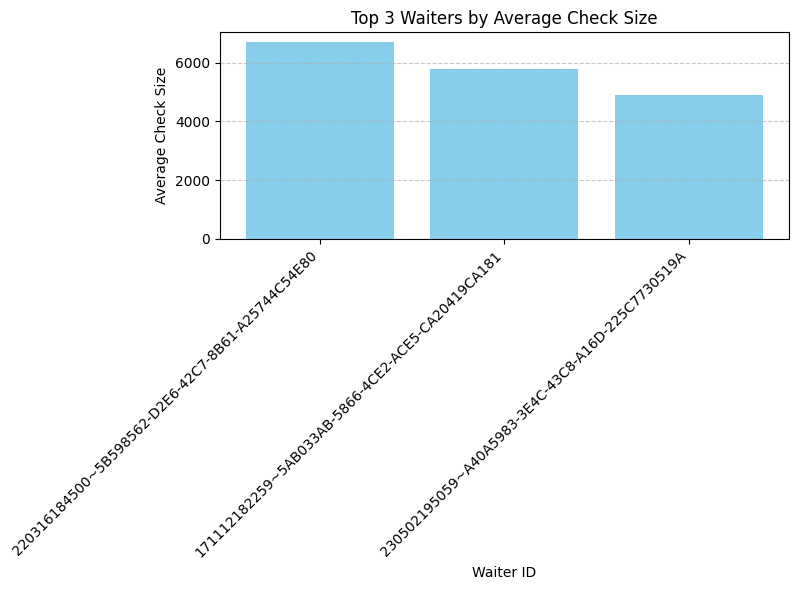

In [55]:
average_check_sizes = df.groupby('waiter_uuid')['bill_total_billed'].mean().reset_index()

average_check_sizes_sorted = average_check_sizes.sort_values(by='bill_total_billed', ascending=False)

top_three_waiters = average_check_sizes_sorted.head(3)

# Step 3: Create a bar chart for the top three waiters

# Option 1: Using matplotlib
plt.figure(figsize=(8, 6))
plt.bar(top_three_waiters['waiter_uuid'], top_three_waiters['bill_total_billed'], color='skyblue')
plt.title('Top 3 Waiters by Average Check Size')
plt.xlabel('Waiter ID')
plt.ylabel('Average Check Size')
plt.xticks(top_three_waiters['waiter_uuid'])  # Ensure only the top 3 waiters are labeled
plt.xticks(rotation=45, ha='right')  # Rotate labels and align them to the right
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [68]:
grouped = df.groupby('waiter_uuid').agg({
    'bill_total_billed': 'sum',  # Replace 'Bills' with the actual column name for bills
    'payment_total_tip': 'sum'    # Replace 'Tips' with the actual column name for tips
}).reset_index()

# Step 2: Filter out waiters with 0 bills
filtered = grouped[grouped['bill_total_billed'] > 0]

# Step 3: Calculate the percentage of tips relative to bills
filtered['Tip_Percentage'] = (filtered['payment_total_tip'] / filtered['bill_total_billed']) * 100
average_tip_percentage_sorted = filtered.sort_values(by='Tip_Percentage', ascending=False)


# Display the ranking table
print("Ranking Table for Average Tip Percentage:")
print(average_tip_percentage_sorted[['waiter_uuid', 'Tip_Percentage']])
average_tip_percentage_sorted = average_tip_percentage_sorted.head(3)

Ranking Table for Average Tip Percentage:
                                            waiter_uuid  Tip_Percentage
959   200206174105~21F2363A-576A-4725-9DEA-5645EF0A32DB   200000.000000
2512  220812082551~02FBC866-D5C6-49C8-92A2-60E4170FACF6     1436.025352
11                 028362a0-d2d5-4eca-8b05-44bf007f9411      231.303007
3888  230814150821~C43723BB-94A2-475A-8EB6-805982B9B15B      226.172306
1247  201102092826~66A5EF04-620E-426B-AAB5-D0BF0DFDF25F       67.130215
...                                                 ...             ...
5524  240601121722~D05ACC69-ED96-474B-AA64-CFD5D8FB44C2        0.000000
3878  230809160556~BE2B689C-1C5D-44BC-8993-E102937D255A        0.000000
3843  230731134619~6E35CE57-2342-4C4B-8289-E7B3FE83B4C0       -0.012765
2010  220130182717~5861C270-ADAD-4730-8043-B23BAFA8AF9C       -0.020499
1300  210122081444~D9C0DACA-2308-4133-AB9F-6A99E0B12707       -8.883641

[8967 rows x 2 columns]


/var/folders/nj/sdrbc2n53j7bgbf8ffz9x0r40000gn/T/ipykernel_91178/1734889665.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['Tip_Percentage'] = (filtered['payment_total_tip'] / filtered['bill_total_billed']) * 100


/var/folders/nj/sdrbc2n53j7bgbf8ffz9x0r40000gn/T/ipykernel_91178/3527739696.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='waiter_uuid', y='Tip_Percentage', data=average_tip_percentage_sorted, palette='viridis')


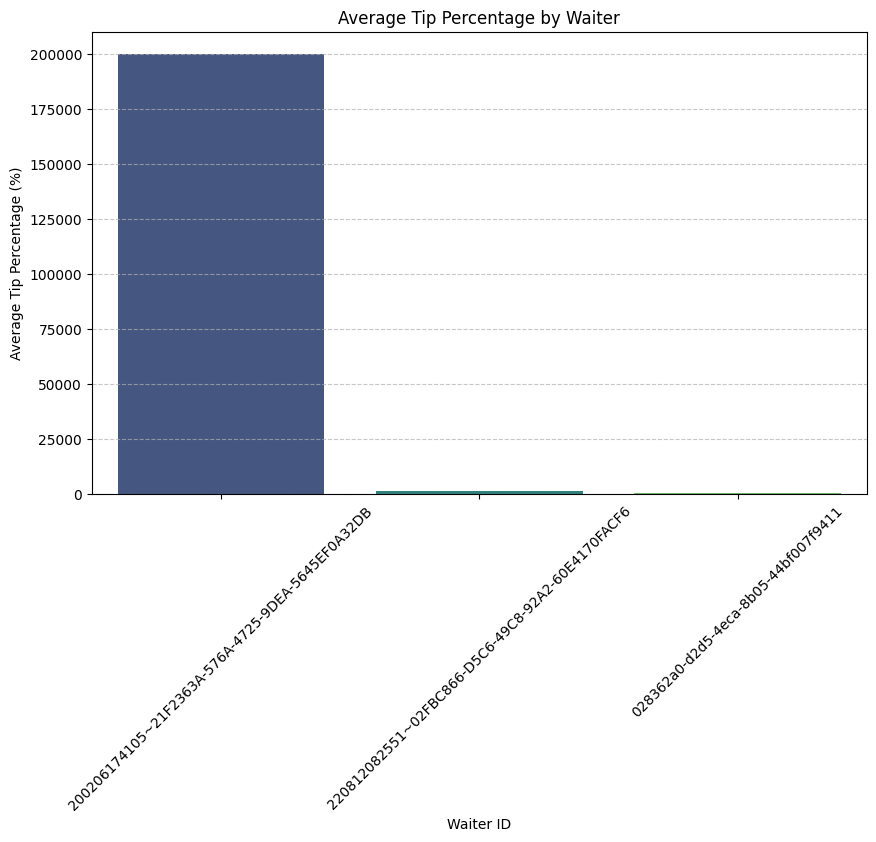

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(x='waiter_uuid', y='Tip_Percentage', data=average_tip_percentage_sorted, palette='viridis')
plt.title('Average Tip Percentage by Waiter')
plt.xlabel('Waiter ID')
plt.ylabel('Average Tip Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [70]:
df1 = pd.read_csv('../bills.csv')


df1 = df1[['venue_xref_id', 'waiter_uuid', 'bill_total_billed','payment_total_tip']]

df1.to_csv('Q5.csv', index=False)

In [72]:
df2 = pd.read_csv('venues.csv')
# Merge the two DataFrames on the 'venue_id' column
merged_df = pd.merge(df1, df2, on='venue_xref_id', how='inner')
merged_df.head(20)

,venue_xref_id,waiter_uuid,bill_total_billed,payment_total_tip,concept,city,country,start_of_day_offset
0,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD,21.81,0.0,NaN,Collingwood,CA,00:00:00
1,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD,48.95,0.0,NaN,Collingwood,CA,00:00:00
2,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD,26.94,0.0,NaN,Collingwood,CA,00:00:00
3,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD,3.96,0.0,NaN,Collingwood,CA,00:00:00
4,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD,3.36,0.0,NaN,Collingwood,CA,00:00:00
5,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD,16.36,0.0,NaN,Collingwood,CA,00:00:00
6,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD,17.42,0.0,NaN,Collingwood,CA,00:00:00
7,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD,25.11,0.0,NaN,Collingwood,CA,00:00:00
8,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD,4.97,0.0,NaN,Collingwood,CA,00:00:00
9,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD,19.00,6.0,NaN,Collingwood,CA,00:00:00


In [73]:
merged_df.to_csv('Q5.csv', index=False)

In [76]:
df1 = pd.read_csv('Q5.csv')
df1.head()
df1.size

71638288

In [92]:
import os
grouped = df1.groupby(['venue_xref_id','waiter_uuid']).agg({
    'bill_total_billed': 'sum',  # Replace 'Bills' with the actual column name for bills
    'payment_total_tip': 'sum'    # Replace 'Tips' with the actual column name for tips
}).reset_index()

# Step 2: Filter out waiters with 0 bills
filtered = grouped[grouped['bill_total_billed'] > 0]

# Step 3: Calculate the percentage of tips relative to bills
filtered['Tip_Percentage'] = (filtered['payment_total_tip'] / filtered['bill_total_billed']) * 100

# Step 4: Sort by tip percentage in descending order
average_tip_percentage_sorted = filtered.sort_values(by='Tip_Percentage', ascending=False)

# Step 5: Group by 'venue_xref_id' and display the top waiters for each venue
grouped_by_venue = average_tip_percentage_sorted.groupby('venue_xref_id')

output_folder = 'tip_percentage_graphs'
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Step 7: Plot and save each graph
for venue, group in grouped_by_venue:
    plt.figure(figsize=(10, 6))
    sns.set_style('whitegrid')
    ax = sns.barplot(x='waiter_uuid', y='Tip_Percentage', data=group, palette='viridis')
    plt.title(f'Tip Percentage Ranking for Venue: {venue}', fontsize=16)
    plt.xlabel('Waiter UUID', fontsize=14)
    plt.ylabel('Tip Percentage (%)', fontsize=14)
    plt.xticks(rotation=45)
    
    # Add annotations
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
    
    plt.tight_layout()
    
    # Save the graph as an image file
    graph_filename = os.path.join(output_folder, f'tip_percentage_ranking_{venue}.png')
    plt.savefig(graph_filename)
    plt.close()  # Close the plot to free up memory

print(f"All graphs have been saved to the folder: {output_folder}")

/var/folders/nj/sdrbc2n53j7bgbf8ffz9x0r40000gn/T/ipykernel_91178/2396189548.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['Tip_Percentage'] = (filtered['payment_total_tip'] / filtered['bill_total_billed']) * 100
/var/folders/nj/sdrbc2n53j7bgbf8ffz9x0r40000gn/T/ipykernel_91178/2396189548.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='waiter_uuid', y='Tip_Percentage', data=group, palette='viridis')
/var/folders/nj/sdrbc2n53j7bgbf8ffz9x0r40000gn/T/ipykernel_91178/2396189548.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed

All graphs have been saved to the folder: tip_percentage_graphs


/var/folders/nj/sdrbc2n53j7bgbf8ffz9x0r40000gn/T/ipykernel_91178/2396189548.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='waiter_uuid', y='Tip_Percentage', data=group, palette='viridis')
